In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Frame the Problem

Given a set of data about cancer pantients, predict whether the tumor is malignant or benign.

## 2. Load the Data

In [4]:
df = pd.read_csv('Data/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### 3. EDA

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

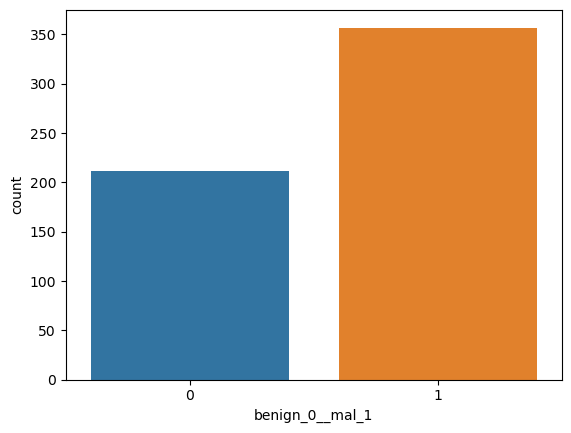

In [12]:
sns.countplot(x='benign_0__mal_1', data=df)

<Axes: >

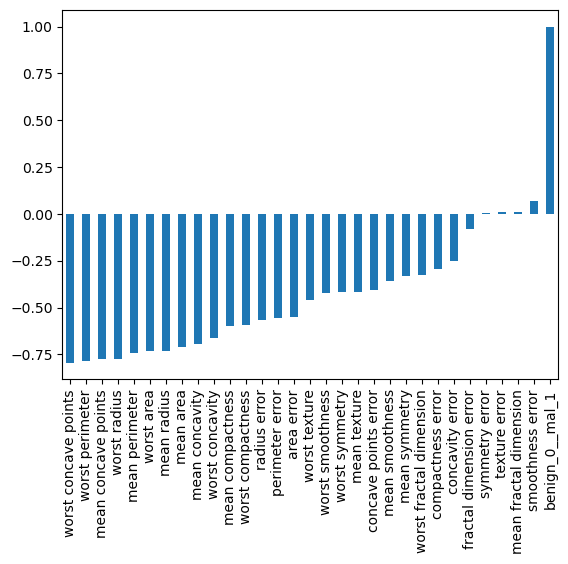

In [13]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

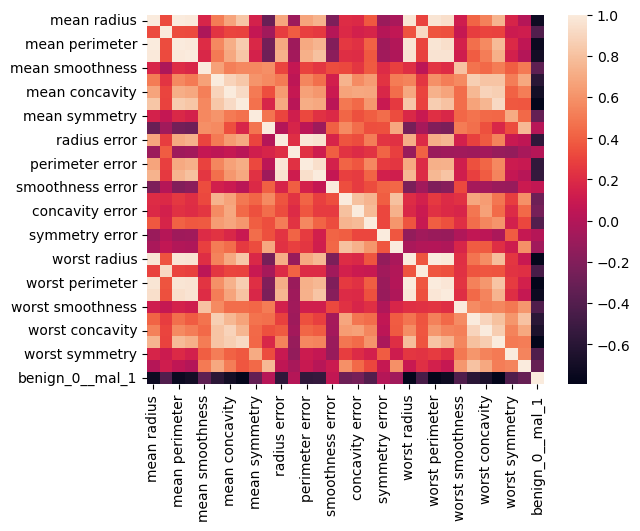

In [14]:
sns.heatmap(df.corr())

## 4. Prepare the Data

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=101) 

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Model Selection & Evaluation

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [22]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6402 - val_loss: 0.6142
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5989 - val_loss: 0.5738
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5569 - val_loss: 0.5283
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5105 - val_loss: 0.4789
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4625 - val_loss: 0.4301
Epoch 6/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4161 - val_loss: 0.3847
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3756 - val_loss: 0.3428
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3365 - val_loss: 0.3090
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3069 - val_loss: 0.2771
Epoch 10/600
14/14 [==============================] - 0s 1ms/step - loss: 0.2804 - val_loss: 0.2533
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.0529 - val_loss: 0.1211
Epoch 84/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0508 - val_loss: 0.1287
Epoch 85/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0518 - val_loss: 0.1253
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0541 - val_loss: 0.1250
Epoch 87/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0551 - val_loss: 0.1273
Epoch 88/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0523 - val_loss: 0.1212
Epoch 89/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0518 - val_loss: 0.1318
Epoch 90/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0497 - val_loss: 0.1279
Epoch 91/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0503 - val_loss: 0.1293
Epoch 92/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0496 - val_loss: 0.1288
Epoch 93/600


14/14 [==============================] - 0s 1ms/step - loss: 0.0446 - val_loss: 0.1421
Epoch 165/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0417 - val_loss: 0.1504
Epoch 166/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0400 - val_loss: 0.1435
Epoch 167/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0411 - val_loss: 0.1444
Epoch 168/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0419 - val_loss: 0.1477
Epoch 169/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0408 - val_loss: 0.1496
Epoch 170/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0415 - val_loss: 0.1471
Epoch 171/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0395 - val_loss: 0.1509
Epoch 172/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0392 - val_loss: 0.1446
Epoch 173/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0418 - val_loss: 0.1491
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0379 - val_loss: 0.1757
Epoch 246/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0361 - val_loss: 0.1554
Epoch 247/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0360 - val_loss: 0.1588
Epoch 248/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0350 - val_loss: 0.1619
Epoch 249/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0341 - val_loss: 0.1637
Epoch 250/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0340 - val_loss: 0.1579
Epoch 251/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0345 - val_loss: 0.1648
Epoch 252/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0347 - val_loss: 0.1577
Epoch 253/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0362 - val_loss: 0.1640
Epoch 254/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0372 - val_loss: 0.1618
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0293 - val_loss: 0.1736
Epoch 327/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0327 - val_loss: 0.2026
Epoch 328/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0312 - val_loss: 0.1678
Epoch 329/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0322 - val_loss: 0.1823
Epoch 330/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0300 - val_loss: 0.1798
Epoch 331/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.1768
Epoch 332/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0304 - val_loss: 0.1854
Epoch 333/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0295 - val_loss: 0.1821
Epoch 334/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0297 - val_loss: 0.1854
Epoch 335/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0283 - val_loss: 0.1734
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0243 - val_loss: 0.1991
Epoch 408/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0261 - val_loss: 0.1930
Epoch 409/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0248 - val_loss: 0.1852
Epoch 410/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0262 - val_loss: 0.1936
Epoch 411/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 0.1995
Epoch 412/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0248 - val_loss: 0.1847
Epoch 413/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0276 - val_loss: 0.2013
Epoch 414/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0263 - val_loss: 0.2024
Epoch 415/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0254 - val_loss: 0.1886
Epoch 416/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0266 - val_loss: 0.2083
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.2024
Epoch 489/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.2036
Epoch 490/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0210 - val_loss: 0.2035
Epoch 491/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0243 - val_loss: 0.2136
Epoch 492/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.2032
Epoch 493/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0225 - val_loss: 0.2024
Epoch 494/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0235 - val_loss: 0.1989
Epoch 495/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0230 - val_loss: 0.2264
Epoch 496/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0259 - val_loss: 0.2005
Epoch 497/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.2106
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0211 - val_loss: 0.2435
Epoch 570/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0259 - val_loss: 0.2148
Epoch 571/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0178 - val_loss: 0.2225
Epoch 572/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0190 - val_loss: 0.2285
Epoch 573/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.2157
Epoch 574/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0198 - val_loss: 0.2309
Epoch 575/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.2139
Epoch 576/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.2450
Epoch 577/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0168 - val_loss: 0.2154
Epoch 578/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0194 - val_loss: 0.2560
Epoc

### Overfitting to Training Data

<Axes: >

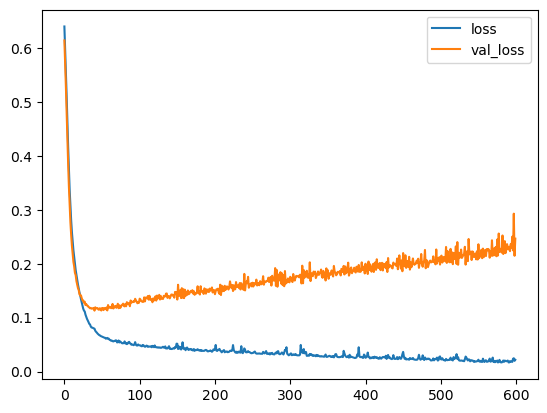

In [26]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Use EarlyStopping to stop before overfitting happens

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quanti

In [34]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [35]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6890 - val_loss: 0.6752
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6649 - val_loss: 0.6583
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6477 - val_loss: 0.6402
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6251 - val_loss: 0.6124
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5911 - val_loss: 0.5738
Epoch 6/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5533 - val_loss: 0.5333
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5124 - val_loss: 0.4926
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4729 - val_loss: 0.4519
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4322 - val_loss: 0.4104
Epoch 10/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3924 - val_loss: 0.3705
Epoch 11/

<Axes: >

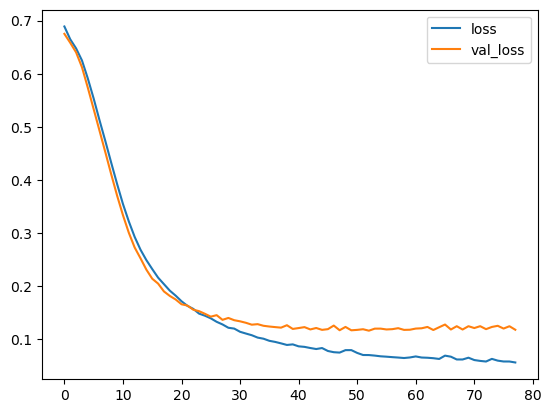

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Add in Dropout Layers

In [38]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5)) # Common values are between 0.2 & 0.5

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7025 - val_loss: 0.6782
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6615 - val_loss: 0.6503
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6483 - val_loss: 0.6221
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6080 - val_loss: 0.5941
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5872 - val_loss: 0.5642
Epoch 6/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5707 - val_loss: 0.5333
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5295 - val_loss: 0.5018
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5141 - val_loss: 0.4694
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4993 - val_loss: 0.4384
Epoch 10/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4663 - val_loss: 0.4096
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.1034 - val_loss: 0.1006
Epoch 84/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1079 - val_loss: 0.0920
Epoch 85/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1051 - val_loss: 0.1179
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1012 - val_loss: 0.0890
Epoch 87/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1181 - val_loss: 0.1027
Epoch 88/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1013 - val_loss: 0.0984
Epoch 89/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0970 - val_loss: 0.0868
Epoch 90/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1073 - val_loss: 0.0972
Epoch 91/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1082 - val_loss: 0.0983
Epoch 92/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0855 - val_loss: 0.0853
Epoch 93/600


<Axes: >

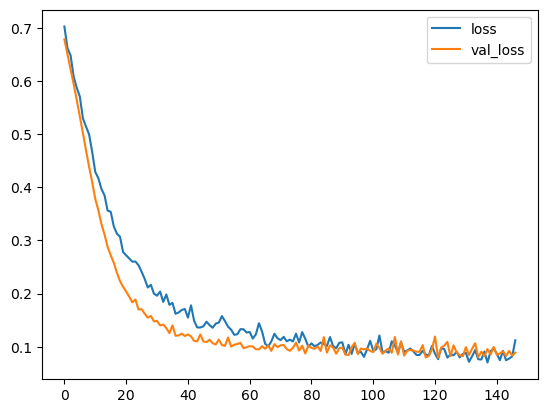

In [40]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [45]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 862us/step


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [48]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
